EDA

Our main objective is to answer key questions about the usage of precipitation data:

1) How the deforestation process correlates with precipitations?

In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import geopandas as gpd
from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import box

import config
from utils import compute_frames

In [2]:
# load legal amazon limits
am_bounds = gpd.read_file(config.AMAZON_FRONTIER_DATA)

In [3]:
# load frames idx detail
frames_idx = pd.read_csv(config.TR_FRAMES_IDX, index_col=0)

In [4]:
# load frames deforestation area history
deforestation = pd.read_csv(config.TR_DEFORESTATION, index_col=0)
deforestation["quarter_date"] = pd.to_datetime(deforestation["quarter_date"])

In [5]:
# precipitations
precip = pd.read_csv(config.TR_RAIN_AVG)
precip["quarter_date"] = pd.to_datetime(precip["dt"])

In [6]:
# relation precipitations and deforestation
m = pd.merge(precip, deforestation, on=["frame_id", "quarter_date"], how="left")

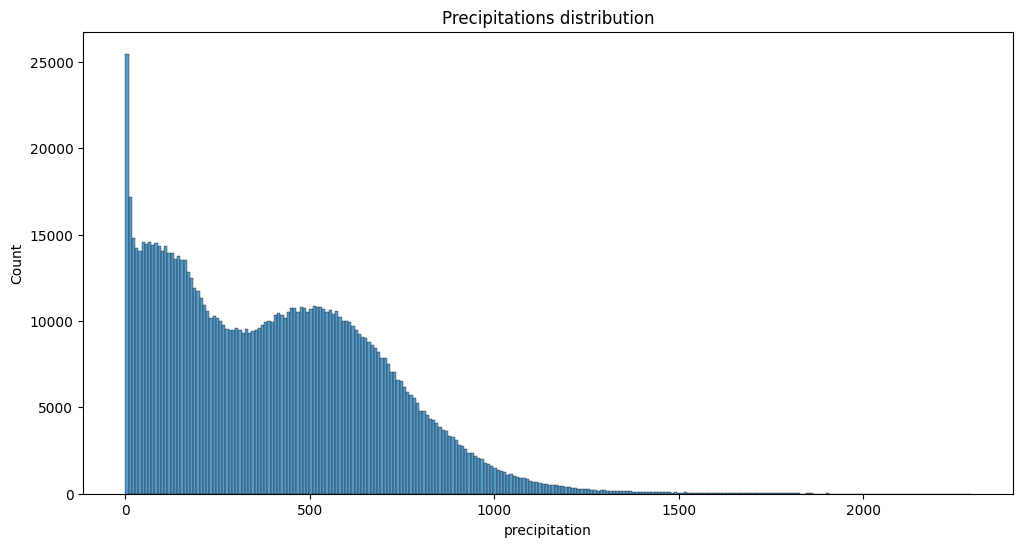

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(precip.sample(frac=0.05), x="precipitation", ax=ax)
ax.set_title("Precipitations distribution")
plt.show()

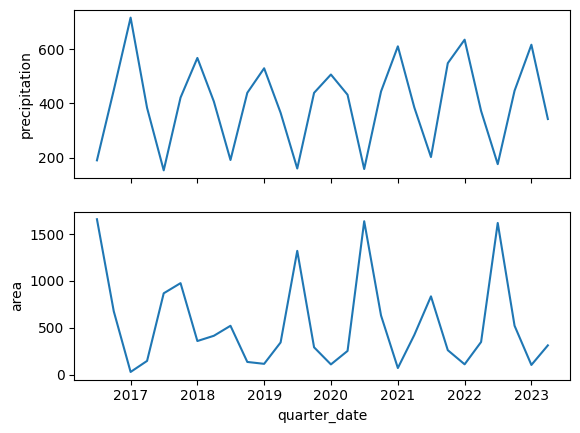

In [21]:
fig, ax = plt.subplots(2, sharex=True)
sns.lineplot(m.groupby("quarter_date")["precipitation"].mean(), ax=ax[0])
sns.lineplot(m.groupby("quarter_date")["area"].sum(), ax=ax[1])
plt.show()

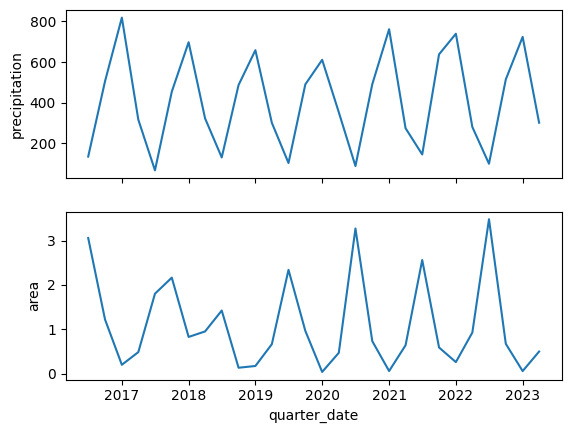

In [27]:
selected_frames = m.dropna()["frame_id"].sample(100).values
fig, ax = plt.subplots(2, sharex=True)
sns.lineplot(m[m["frame_id"].isin(selected_frames)].groupby("quarter_date")["precipitation"].mean(), ax=ax[0])
sns.lineplot(m[m["frame_id"].isin(selected_frames)].groupby("quarter_date")["area"].sum(), ax=ax[1])
plt.show()

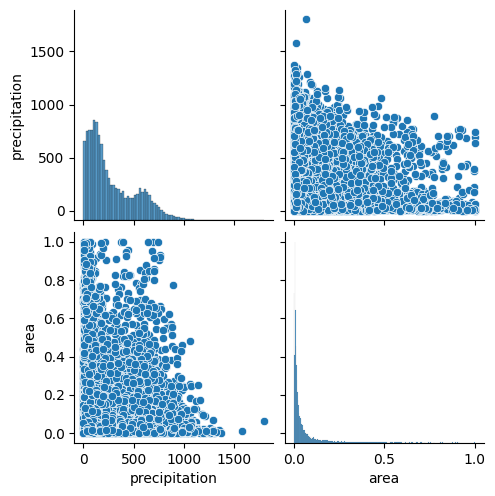

In [10]:
sns.pairplot(m.dropna().sample(frac=0.01)[["precipitation", "area"]], kind="kde")
plt.show()

In [11]:
m[["precipitation", "area"]].corr()

,precipitation,area
precipitation,1.000000,-0.086991
area,-0.086991,1.000000


In [35]:
dt_dict = {dt: i for (i, dt) in enumerate(m["quarter_date"].unique())}
dt_rdict = {i: dt for (dt, i) in dt_dict.items()}
dt_dict

{Timestamp('2016-07-01 00:00:00'): 0,
 Timestamp('2016-10-01 00:00:00'): 1,
 Timestamp('2017-01-01 00:00:00'): 2,
 Timestamp('2017-04-01 00:00:00'): 3,
 Timestamp('2017-07-01 00:00:00'): 4,
 Timestamp('2017-10-01 00:00:00'): 5,
 Timestamp('2018-01-01 00:00:00'): 6,
 Timestamp('2018-04-01 00:00:00'): 7,
 Timestamp('2018-07-01 00:00:00'): 8,
 Timestamp('2018-10-01 00:00:00'): 9,
 Timestamp('2019-01-01 00:00:00'): 10,
 Timestamp('2019-04-01 00:00:00'): 11,
 Timestamp('2019-07-01 00:00:00'): 12,
 Timestamp('2019-10-01 00:00:00'): 13,
 Timestamp('2020-01-01 00:00:00'): 14,
 Timestamp('2020-04-01 00:00:00'): 15,
 Timestamp('2020-07-01 00:00:00'): 16,
 Timestamp('2020-10-01 00:00:00'): 17,
 Timestamp('2021-01-01 00:00:00'): 18,
 Timestamp('2021-04-01 00:00:00'): 19,
 Timestamp('2021-07-01 00:00:00'): 20,
 Timestamp('2021-10-01 00:00:00'): 21,
 Timestamp('2022-01-01 00:00:00'): 22,
 Timestamp('2022-04-01 00:00:00'): 23,
 Timestamp('2022-07-01 00:00:00'): 24,
 Timestamp('2022-10-01 00:00:00'): 

In [48]:
m["dt1"] = m["quarter_date"].apply(lambda dt: dt_rdict.get(dt_dict[dt]-1))

In [50]:
pd.merge(
    m[["frame_id", "quarter_date", "area"]], 
    m[["frame_id", "dt1", "precipitation"]], 
    left_on=["frame_id", "quarter_date"], 
    right_on=["frame_id", "dt1"],
    how="inner"
).corr()

,frame_id,quarter_date,area,dt1,precipitation
frame_id,1.000000,0.002192,0.146318,0.002192,-0.152398
quarter_date,0.002192,1.000000,-0.067177,1.000000,-0.003857
area,0.146318,-0.067177,1.000000,-0.067177,0.018011
dt1,0.002192,1.000000,-0.067177,1.000000,-0.003857
precipitation,-0.152398,-0.003857,0.018011,-0.003857,1.000000
